In [58]:
from riskyneuroarousal.utils.load_data import load_behavioral_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp, false_discovery_control
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
pth_ddm_results = "/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/data/ddm_parameters_baseline.csv"
ddm_results = pd.read_csv(pth_ddm_results)

In [34]:
ddm_results.query("model_ID == 8")["param_name"].unique()

array(['theta', 'v_Intercept', 'v_gain', 'v_loss', 'v_baseline',
       'z_Intercept', 'z_baseline', 'a_Intercept', 'a_baseline',
       't_Intercept', 't_baseline', 'BIC'], dtype=object)

In [53]:
starting_point_baseline = ddm_results.query("model_ID == 8 & param_name == 'z_baseline'")[["mean", "sub"]]
starting_point_baseline = starting_point_baseline.rename(columns={"mean": "starting_point_baseline"})

boundary_baseline = ddm_results.query("model_ID == 8 & param_name == 'a_baseline'")[["mean", "sub"]]
boundary_baseline = boundary_baseline.rename(columns={"mean": "boundary_baseline"})

drift_baseline = ddm_results.query("model_ID == 8 & param_name == 'v_baseline'")[["mean", "sub"]]
drift_baseline = drift_baseline.rename(columns={"mean": "drift_baseline"})

ter_baseline = ddm_results.query("model_ID == 8 & param_name == 't_baseline'")[["mean", "sub"]]
ter_baseline = ter_baseline.rename(columns={"mean": "ter_baseline"})

In [54]:
behavior = load_behavioral_data()
cond_sub = behavior[["sub", "condition"]].drop_duplicates()

In [55]:
data = pd.merge(starting_point_baseline, boundary_baseline, on="sub")
data = pd.merge(data, drift_baseline, on="sub")
data = pd.merge(data, ter_baseline, on="sub")
data = pd.merge(data, cond_sub, on="sub")

In [57]:
terms = ["starting_point_baseline", "boundary_baseline", "drift_baseline", "ter_baseline"]
conditions = ["equalIndifference", "equalRange"]

p_values = []
for term in terms:
    for condition in conditions:
        data_term = data.query(f"condition == '{condition}'")[term]
        t, p = ttest_1samp(data_term, 0)
        p_values.append(p)

In [60]:
p_values

[np.float64(0.15368934185838562),
 np.float64(0.5789418937651829),
 np.float64(0.04013717966430425),
 np.float64(0.4944191481917811),
 np.float64(0.6231746475029679),
 np.float64(0.10265660047254264),
 np.float64(0.5025087603118639),
 np.float64(0.03750203033436102)]

In [62]:
false_discovery_control(p_values, method = "by")

array([0.83541135, 1.        , 0.43634848, 1.        , 1.        ,
       0.74401593, 1.        , 0.43634848])

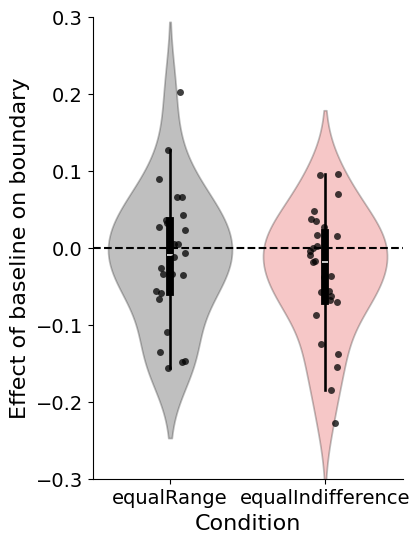

In [66]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=data, x="condition", y="boundary_baseline", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=data, x="condition", y="boundary_baseline", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Effect of baseline on boundary", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(-0.3, 0.3)
# draw horizontal line at 0
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [40]:
ttest_ind(data.query("condition == 'equalIndifference'")["boundary_baseline"], data.query("condition == 'equalRange'")["boundary_baseline"])

TtestResult(statistic=np.float64(-0.918492085973017), pvalue=np.float64(0.3626021962625978), df=np.float64(52.0))

In [43]:
ttest_1samp(data.query("condition == 'equalIndifference'")["boundary_baseline"], 0)

TtestResult(statistic=np.float64(-2.1562177506811424), pvalue=np.float64(0.04013717966430425), df=np.int64(27))

In [44]:
ttest_1samp(data.query("condition == 'equalRange'")["boundary_baseline"], 0)

TtestResult(statistic=np.float64(-0.6934516449082357), pvalue=np.float64(0.4944191481917811), df=np.int64(25))

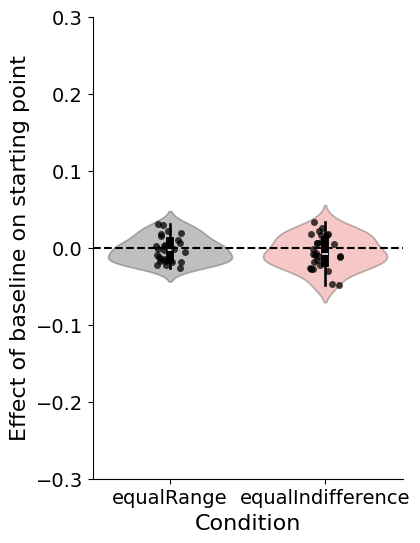

In [67]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=data, x="condition", y="starting_point_baseline", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=data, x="condition", y="starting_point_baseline", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Effect of baseline on starting point", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(-0.3, 0.3)
# draw horizontal line at 0
plt.axhline(0, color='black', linestyle='--')
plt.show()

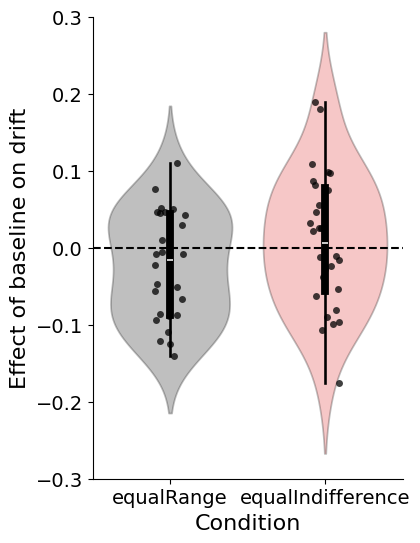

In [69]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=data, x="condition", y="drift_baseline", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=data, x="condition", y="drift_baseline", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Effect of baseline on drift", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(-0.3, 0.3)
# draw horizontal line at 0
plt.axhline(0, color='black', linestyle='--')
plt.show()

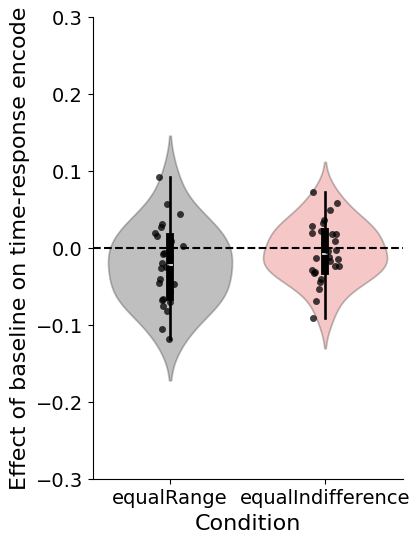

In [70]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
fig, ax = plt.subplots(figsize=(4, 6))
sns.violinplot(data=data, x="condition", y="ter_baseline", hue = "condition",  palette=custom_palette, alpha = 0.25)
sns.stripplot(data=data, x="condition", y="ter_baseline", color="black", alpha=0.75)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Effect of baseline on time-response encode", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(-0.3, 0.3)
# draw horizontal line at 0
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [ ]:
ttest_ind(data.query("condition == 'equalIndifference'")["boundary_baseline"], data.query("condition == 'equalRange'")["boundary_baseline"])

In [5]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [13]:
print("Starting point")
print(ttest_ind(data.query("condition == 'equalIndifference'")["starting_point"].values, data.query("condition == 'equalRange'")["starting_point"].values))
print(cohend(data.query("condition == 'equalIndifference'")["starting_point"].values, data.query("condition == 'equalRange'")["starting_point"].values))
print(np.mean(data.query("condition == 'equalIndifference'")["starting_point"].values), np.mean(data.query("condition == 'equalRange'")["starting_point"].values))

Starting point
TtestResult(statistic=np.float64(2.629150461819305), pvalue=np.float64(0.009832222546389833), df=np.float64(106.0))
0.5059802422904682
0.5549930448555797 0.5127919760567338


In [14]:
print("Starting point")
print(ttest_ind(data.query("condition == 'equalIndifference'")["pt_lambda"].values, data.query("condition == 'equalRange'")["pt_lambda"].values))
print(cohend(data.query("condition == 'equalIndifference'")["pt_lambda"].values, data.query("condition == 'equalRange'")["pt_lambda"].values))
print(np.mean(data.query("condition == 'equalIndifference'")["pt_lambda"].values), np.mean(data.query("condition == 'equalRange'")["pt_lambda"].values))

Starting point
TtestResult(statistic=np.float64(5.1401501473112905), pvalue=np.float64(1.2614269575731035e-06), df=np.float64(106.0))
0.9892223570750894
1.477367230997721 1.1215816624005501


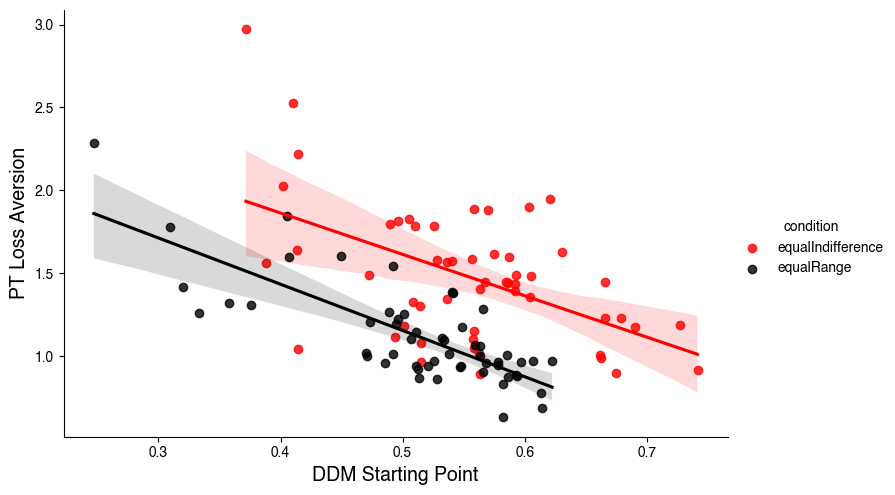

In [33]:
custom_palette = {"equalIndifference": "red", "equalRange": "black"}
plt.rcParams["font.family"] = "Helvetica"
sns.lmplot(x="starting_point", y="pt_lambda", data=data, hue="condition", palette=custom_palette, height=5, aspect=1.5)
plt.xlabel("DDM Starting Point", fontsize=14)
plt.ylabel("PT Loss Aversion", fontsize=14)
plt.show()